In [17]:
import os
import shutil
import csv
import pandas as pd
import glob
import datetime
import unidecode
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile
import pandas as pd

# replace 'filename.csv' with the name of your CSV file
df = pd.read_csv('/scratch/students/bousbina/corpus/USA/df_nyh.csv')
df = df.sort_values('date', ascending=True)

# display the first few rows of the DataFrame
df.head()



In [45]:


# # Get list of all articles
# every_article = glob.glob('/scratch/students/bousbina/corpus/USA/filtered_data.csv')
# dates_us = set()

# for article in tqdm(every_article):
#     date = article.split("/")[-1][:10]
#     dates_us.add(date)
    
# with open('/scratch/students/bousbina/corpus/USA/dates_us.txt', 'w') as f:
#     # parse dates as datetime objects and sort them
#     dates_us_sorted = sorted([datetime.datetime.strptime(date, '%Y/%m/%d') for date in dates_us])
#     # convert datetime objects back to strings in the desired format and write them to file
#     f.write('\n'.join([date.strftime('%Y/%m/%d') for date in dates_us_sorted]))


In [9]:
print("Total number of articles : " ,df.shape[0])

Total number of articles :  147709


In [34]:
filtered_df = df[df['text'].str.contains('futur')]




In [28]:
filtered_df.to_csv('/scratch/students/bousbina/corpus/USA/filtered_data.csv', index=False)

filtered_df.head()

,date,text,height
92403,1836/01/04,"mainmast gone; she bore down for the wreck, ba...","[132, 137, 132, 129, 129, 137, 132, 150, 124, ..."
92423,1836/01/07,"JL . . . . * THE HERALD. NEW-YORK, THURSDAY, J...","[101, 11, 11, 6, 6, 78, 232, 245, 150, 173, 13..."
92391,1836/01/08,"THE HERALD. I _ | NEW-YORK. FRIDAY, JAN. 8, IS...","[222, 240, 407, 57, 240, 150, 173, 142, 147, 1..."
92347,1836/01/09,"THE HERALD. NEW-YORK, SATURDAY, JAN. 9, 1836. ...","[222, 232, 142, 173, 142, 150, 132, 137, 137, ..."
92394,1836/01/11,"WALL HTREKT.?MONDAY, A great aUal of speculati...","[137, 165, 111, 114, 111, 119, 124, 111, 147, ..."


In [10]:

print("Total number of articles filtered  : " ,filtered_df.shape[0])

Total number of articles filtered  :  60444


In [29]:
filtered_df.columns

Index(['date', 'text', 'height'], dtype='object')


## Counting raw "future" and "futur" frequency in the corpus

/tmp/ipykernel_1594680/513010825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["date"] = pd.to_datetime(filtered_df["date"], format="%Y/%m/%d").dt.date


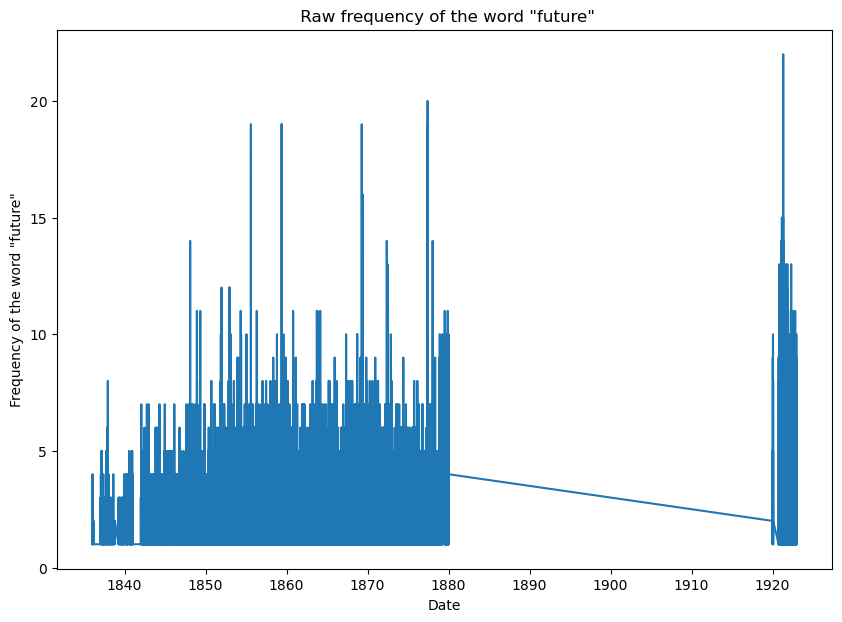

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


filtered_df["date"] = pd.to_datetime(filtered_df["date"], format="%Y/%m/%d").dt.date
filtered_df = filtered_df.set_index("date")
x= np.arange(len(df))


#We define a function that counts raw frequency 
def count_word_frequency(word, text):
    return text.count(word)

#Create a new column in the dataframe for the raw frequency of the word in each row using the apply()
#method and the count_word_frequency() function.

word = "futur"
filtered_df["frequency"] = filtered_df["text"].apply(lambda x: count_word_frequency(word, x))



# filtered_df["futur_frequency"] = filtered_df['text'].str.count('future')

# # Get the raw frequency by summing up the counts from all rows
# raw_frequency = filtered_df['futur_frequency'].sum()

# freq_by_date = filtered_df.groupby('date')['futur_frequency'].sum()

# Create a scatter plot of the frequency counts vs. date
plt.figure(figsize=(10,7))
plt.plot(filtered_df.index, filtered_df["frequency"], label="Raw frequencies")
# plt.scatter(freq_by_date.index, freq_by_date.values)
plt.xlabel('Date')
plt.ylabel('Frequency of the word "future"')
plt.title(' Raw frequency of the word "future"')
plt.show()


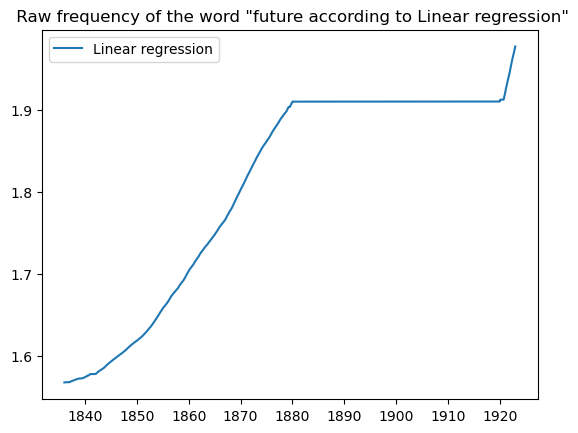

In [37]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to the data
model = LinearRegression()
X = np.arange(len(filtered_df)).reshape(-1, 1)
y = filtered_df['frequency'].values.reshape(-1, 1)
model.fit(X, y)

# Add a regression line to the scatter plot
plt.plot(filtered_df.index, model.predict(X), label="Linear regression")
plt.title(' Raw frequency of the word "future" according to Linear regression')
plt.legend()
plt.show()


## Observation of the trigram "the future is" in four different blocks:
### [1840-1860] ,[1860-1880], [1880-1900], [1900-1920]

In [38]:
import nltk 
import datetime
nltk.download('punkt')
from nltk import ngrams
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

[nltk_data] Downloading package punkt to /home/bousbina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:


# Load the CSV file into a pandas data frame
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv("/scratch/students/bousbina/corpus/USA/filtered_data.csv")
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d').dt.date

# Define the date ranges
range1 = (datetime.datetime.strptime('1840/01/01', '%Y/%m/%d').date(),
          datetime.datetime.strptime('1860/12/31', '%Y/%m/%d').date())

range2 = (datetime.datetime.strptime('1860/01/01', '%Y/%m/%d').date(),
          datetime.datetime.strptime('1880/12/31', '%Y/%m/%d').date())

range3 = (datetime.datetime.strptime('1880/01/01', '%Y/%m/%d').date(),
          datetime.datetime.strptime('1900/12/31', '%Y/%m/%d').date())

range4 = (datetime.datetime.strptime('1900/01/01', '%Y/%m/%d').date(),
          datetime.datetime.strptime('1920/12/31', '%Y/%m/%d').date())




In [ ]:
block1 = df.loc[df["date"].between(range1[0], range1[1])]
new_value1 = block1["text"].apply(nltk.word_tokenize) 
block1.loc[:, "tokens"] =  new_value1

# Print the number of dates in each block
print(f"Block 1 ({range1[0]} - {range1[1]}): {len(block1)} dates")

In [ ]:

block2 = df.loc[df["date"].between(range2[0], range2[1])]
new_value2 = block2["text"].apply(nltk.word_tokenize) 
block2.loc[:, "tokens"] =  new_value2


print(f"Block 2 ({range2[0]} - {range2[1]}): {len(block2)} dates")




In [ ]:

block3 = df.loc[df["date"].between(range3[0], range3[1])]
new_value3 = block3["text"].apply(nltk.word_tokenize) 
block3.loc[:, "tokens"] =  new_value3


print(f"Block 3 ({range3[0]} - {range3[1]}): {len(block3)} dates")



In [ ]:

block4 = df.loc[df["date"].between(range4[0], range4[1])]
new_value4 = block4["text"].apply(nltk.word_tokenize) 
block4.loc[:, "tokens"] =  new_value4



print(f"Block 4 ({range4[0]} - {range4[1]}): {len(block4)} dates")

In [ ]:
import pandas as pd
from nltk import FreqDist



# Create a list of tri-grams in the tokenized text for each block
tri_grams_block_1 = [tri for doc in block1["tokens"] for tri in nltk.ngrams(doc, 3) if (("the","future", "is") == tri) or (("the","futur", "is") == tri)]
tri_grams_block_2 = [tri for doc in block2["tokens"] for tri in nltk.ngrams(doc, 3) if (("the","future", "is") == tri) or (("the","futur", "is") == tri)]
tri_grams_block_3 = [tri for doc in block3["tokens"] for tri in nltk.ngrams(doc, 3) if (("the","future", "is") == tri) or (("the","futur", "is") == tri)]
tri_grams_block_4 = [tri for doc in block4["tokens"] for tri in nltk.ngrams(doc, 3) if (("the","future", "is") == tri) or (("the","futur", "is") == tri)]

# Compute the frequency distribution of the tri-grams for each block
freq_dist_block_1 = FreqDist(tri_grams_block_1)
freq_dist_block_2 = FreqDist(tri_grams_block_2)
freq_dist_block_3 = FreqDist(tri_grams_block_3)
freq_dist_block_4 = FreqDist(tri_grams_block_4)

#Print all occurrences of the tri-gram "le future est" in each block of tokenized text,
print("Block 1 (1840-1860):")
print(tri_grams_block_1)
print("Block 2 (1860-1880):")
print(tri_grams_block_2)
print("Block 3 (1880-1900):")
print(tri_grams_block_3)
print("Block 4 (1900-1920):")
print(tri_grams_block_4)


#find the adjectifve after le future est







### Most common occurences in the blocks

In [ ]:
# Print the five most common word uses of the tri-gram "le future est" in each block
print("Block 1 (1840-1860):")
print(freq_dist_block_1.most_common(5))
print("Block 2 (1860-1880):")
print(freq_dist_block_2.most_common(5))
print("Block 3 (1880-1900):")
print(freq_dist_block_3.most_common(5))
print("Block 4 (1900-1920):")
print(freq_dist_block_4.most_common(5))

### Occurences of  the two grams before and after “ futur  ”

In [ ]:
import re
import spacy
import string 

In [ ]:
import pandas as pd
from nltk import FreqDist

# Create a list of two-grams in the tokenized text for block 1
two_grams_block_1_before = []
two_grams_block_1_after = []

punctuations = string.punctuation



for doc in block1["tokens"]:
    doc = [word for word in doc if word not in punctuations and not word.isdigit()]
    for i in range(len(doc)):
        if doc[i] == ("futur"):
            if i > 1:
                two_grams_block_1_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_1_after.append((doc[i+1], doc[i+2]))




# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_1_before = FreqDist(two_grams_block_1_before)
freq_dist_block_1_after = FreqDist(two_grams_block_1_after)


with open("two-grams-output_us.txt", "w") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_1-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_1_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_1-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_1_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")

# Print all occurrences of the tri-gram "l'avenir" in block of tokenized text
print("Block 1 (1840-1860): \n")
print(f"2-grams before 'le futur': \n")
print(two_grams_block_1_before, "\n")
print(f"2-grams after 'le futur': \n")
print(two_grams_block_1_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_1_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_1_after.most_common())

In [ ]:
# Create a list of two-grams in the tokenized text for block 2
two_grams_block_2_before = []
two_grams_block_2_after = []





for doc in block2["tokens"]:
    doc = [word for word in doc if word not in punctuations and not word.isdigit()]
    for i in range(len(doc)):
        if doc[i] == ("futur"):
            if i > 1:
                two_grams_block_2_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_2_after.append((doc[i+1], doc[i+2]))




# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_2_before = FreqDist(two_grams_block_2_before)
freq_dist_block_2_after = FreqDist(two_grams_block_2_after)



with open("two-grams-output_us.txt", "a") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_2-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_2_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_2-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_2_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")


# Print all occurrences of the tri-gram "l'avenir" in block of tokenized text
print("Block 2 (1860-1880): \n")
print(f"2-grams before 'le futur': \n")
print(two_grams_block_2_before, "\n")
print(f"2-grams after 'le futur': \n")
print(two_grams_block_2_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_2_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_2_after.most_common())

In [ ]:
# Create a list of two-grams in the tokenized text for block 2
two_grams_block_3_before = []
two_grams_block_3_after = []



for doc in block3["tokens"]:
    doc = [word for word in doc if word not in punctuations and not word.isdigit()]
    for i in range(len(doc)):
        if doc[i] == ("futur"):
            if i > 1:
                two_grams_block_3_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_3_after.append((doc[i+1], doc[i+2]))




# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_3_before = FreqDist(two_grams_block_3_before)
freq_dist_block_3_after = FreqDist(two_grams_block_3_after)

with open("two-grams-output.txt_us", "a") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_3-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_2_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_3-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_2_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")



# Print all occurrences of the tri-gram "l'avenir" in block of tokenized text
print("Block 3 (1880-1900): \n")
print(f"2-grams before 'le futur': \n")
print(two_grams_block_3_before, "\n")
print(f"2-grams after 'le futur': \n")
print(two_grams_block_3_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_3_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_3_after.most_common())

In [ ]:
# Create a list of two-grams in the tokenized text for block 2
two_grams_block_4_before = []
two_grams_block_4_after = []



for doc in block4["tokens"]:
    doc = [word for word in doc if word not in punctuations and not word.isdigit()]
    for i in range(len(doc)):
        if doc[i] == ("futur"):
            if i > 1:
                two_grams_block_4_before.append((doc[i-2], doc[i-1]))
            if i < len(doc)-3:
                two_grams_block_4_after.append((doc[i+1], doc[i+2]))




# Compute the frequency distribution of the tri-grams for block 1
freq_dist_block_4_before = FreqDist(two_grams_block_4_before)
freq_dist_block_4_after = FreqDist(two_grams_block_4_after)

with open("two-grams-output_us.txt", "a") as file:
    # Write the two-grams before "futur"
    file.write("-------------------------BLOCK_4-----------------------Two-grams before 'futur':\n")
    for two_gram in two_grams_block_2_before:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")
    # Write the two-grams after "futur"
    file.write("-------------------------BLOCK_4-----------------------Two-grams after 'futur':\n")
    for two_gram in two_grams_block_2_after:
        file.write(f"{two_gram[0]} {two_gram[1]}\n")


# Print all occurrences of the tri-gram "l'avenir" in block of tokenized text
print("Block 4 (1900-1920): \n")
print(f"2-grams before 'le futur': \n")
print(two_grams_block_4_before, "\n")
print(f"2-grams after 'le futur': \n")
print(two_grams_block_4_after, "\n")
print("Most common 2-grams before: \n")
print(freq_dist_block_4_before.most_common(), "\n")
print("Most common 2-grams after: \n")
print(freq_dist_block_4_after.most_common())

## Concordance analysis: 

### A concordance analysis can help us identify the contexts in which the word 'futur' appears. We use the NLTK library that has a Text.concordance() method that we can use to generate a concordance for a word in our corpus.

In [ ]:
from nltk.text import Text

# Create a list of token strings for each block
block1_tokens = [token for doc in block1["tokens"] for token in doc]
block2_tokens = [token for doc in block2["tokens"] for token in doc]
block3_tokens = [token for doc in block3["tokens"] for token in doc]
block4_tokens = [token for doc in block4["tokens"] for token in doc]

# Create a Text object for each block
text_block_1 = Text(block1_tokens)
text_block_2 = Text(block2_tokens)
text_block_3 = Text(block3_tokens)
text_block_4 = Text(block4_tokens)


with open("key-word-in-context-futur_us.txt ", "w") as file :
    file.write("----------------------BLOCK-1-------------------------- \n")
    for line in text_block_1.concordance_list("futur", lines=22):
        file.write(line.line + "\n")
    file.write("----------------------BLOCK-2-------------------------- \n")
    for line in text_block_2.concordance_list("futur", lines=727):
        file.write(line.line + "\n")
    file.write("----------------------BLOCK-3-------------------------- \n")
    for line in text_block_3.concordance_list("futur", lines=793):
        file.write(line.line + "\n")
    file.write("----------------------BLOCK-4-------------------------- \n")
    for line in text_block_4.concordance_list("futur", lines=708):
        file.write(line.line + "\n")
    

# Perform a concordance analysis for the word "futur" in each block
print("Concordance analysis for 'futur' in Block 1:")
text_block_1.concordance("futur")
print("\nConcordance analysis for 'futur' in Block 2:")
text_block_2.concordance("futur")
print("\nConcordance analysis for 'futur' in Block 3:")
text_block_3.concordance("futur")
print("\nConcordance analysis for 'futur' in Block 4:")
text_block_4.concordance("futur")


